In [ ]:
pip install --prefix /usr/local joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Objective:Making a model based on logistic regression and predicting values based on it.The dataset used for it is "Credit card frad detection dataset"**





In [ ]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#loading dataset 
credit_card_data=pd.read_csv('/content/creditcard.csv')
credit_card_data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0


In [5]:
#dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [6]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
#in the dataset class label for legit or legal transaction is marked as '0' and illegal is marked as '1'
credit_card_data['Class'].value_counts()

0.0    9926
1.0      38
Name: Class, dtype: int64

#**So,we can see that dataset is highly imbalanced as number of entries for legal transaction is 187892 and that of illegal is 368 so we need to make a sample of uniform dataset of both entries almost equal** 

In [8]:
#seperating the dataset for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [9]:
#printing both legit and fraud
print(legit.shape)
print(fraud.shape)

(9926, 31)
(38, 31)


In [10]:
#statistical measures of the data
legit.Amount.describe()

count    9926.000000
mean       62.919501
std       184.041297
min         0.000000
25%         5.172500
50%        15.950000
75%        51.067500
max      7712.430000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [12]:
#compare both the values of fraud and legit
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,5921.607697,-0.235577,0.266833,0.934388,0.239735,-0.041743,0.140925,-0.057661,-0.069971,0.813003,...,0.026103,-0.055139,-0.152043,-0.033460,0.023142,0.087567,0.107554,0.003624,0.001701,62.919501
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,...,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


#**So the data is highly imbalanced so we are taking random values for 368 legit dataset as fraud contains 368**

In [13]:
#sample space for legit dataset
legit_sample=legit.sample(n=368)

#**Now concatenating both the datasets of fraud and legit_sample**

In [14]:
#Concatenating both dataset
new_dataset=pd.concat([legit_sample,fraud],axis=0)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8035,11000,-1.170456,-0.206138,1.469833,-0.739308,-0.019546,-0.477475,-0.470733,-0.257482,-0.053809,...,0.077443,0.566008,0.063553,0.007272,-0.536597,-0.362700,-0.354310,0.336968,15.95,0.0
3708,3177,1.217538,0.204463,0.534669,0.504059,-0.415855,-0.665695,-0.036508,-0.062229,-0.224706,...,-0.205073,-0.626736,0.123036,0.325954,0.189827,0.077010,-0.032438,0.008969,1.79,0.0
6385,7589,-0.271919,1.294849,1.104971,0.057965,0.587584,-0.434542,0.659491,-0.149449,0.816090,...,-0.460805,-0.958473,-0.121772,-0.543873,-0.043225,0.082466,0.224202,0.085008,1.78,0.0
9575,14388,-1.284217,1.874005,0.689970,-0.126110,0.439679,-0.489569,0.663589,-0.175518,1.579571,...,-0.603112,-0.982829,-0.122104,-0.551444,0.071018,0.029176,-0.033241,-0.246911,8.96,0.0
3676,3141,-0.358014,0.700255,1.096679,-2.033411,0.158907,-1.506258,1.162467,-0.433361,0.859311,...,0.058218,0.540148,-0.294569,0.381076,0.068080,-0.838596,0.237765,-0.014088,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,12597,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.00,1.0
9179,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00,1.0
9252,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00,1.0
9487,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1.0


In [15]:
new_dataset['Class'].value_counts()

0.0    368
1.0     38
Name: Class, dtype: int64

#**Thus now the dataset is a good fit for testing and training**

In [16]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,6029.978261,-0.306925,0.331564,0.978815,0.125671,-0.091845,0.168950,-0.122101,-0.127280,0.853865,...,0.019223,-0.000982,-0.156311,-0.065719,-0.026865,0.102821,0.121241,-0.005709,-0.012762,59.885870
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,...,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


#**Splitting the dataset into "Features and "Targets"**

In [17]:
#Splitting the dataset into "Features and "Targets"
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [18]:
print(X)

       Time        V1        V2         V3         V4        V5        V6  \
8035  11000 -1.170456 -0.206138   1.469833  -0.739308 -0.019546 -0.477475   
3708   3177  1.217538  0.204463   0.534669   0.504059 -0.415855 -0.665695   
6385   7589 -0.271919  1.294849   1.104971   0.057965  0.587584 -0.434542   
9575  14388 -1.284217  1.874005   0.689970  -0.126110  0.439679 -0.489569   
3676   3141 -0.358014  0.700255   1.096679  -2.033411  0.158907 -1.506258   
...     ...       ...       ...        ...        ...       ...       ...   
9035  12597 -2.589617  7.016714 -13.705407  10.343228 -2.954461 -3.055116   
9179  13126 -2.880042  5.225442 -11.063330   6.689951 -5.759924 -2.244031   
9252  13323 -5.454362  8.287421 -12.752811   8.594342 -3.106002 -3.179949   
9487  14073 -4.153014  8.204797 -15.031714  10.330100 -3.994426 -3.250013   
9509  14152 -4.710529  8.636214 -15.496222  10.313349 -4.351341 -3.322689   

             V7        V8        V9  ...       V20       V21       V22  \
8

In [19]:
print(Y)

8035    0.0
3708    0.0
6385    0.0
9575    0.0
3676    0.0
       ... 
9035    1.0
9179    1.0
9252    1.0
9487    1.0
9509    1.0
Name: Class, Length: 406, dtype: float64


#**Splitting the dataset into testing and training**

In [20]:
#Splitting the dataset into testing and training
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(406, 30) (324, 30) (82, 30)


#**Model Training**

#**Logistic Regression**

In [34]:
model=LogisticRegression()

#**Training the model with logistic regression on the training data**

In [23]:
model.fit(X_train, Y_train)

LogisticRegression()

#**Model Evaluation :Measuring the accurracy of the model**

In [24]:
joblib.dump(model,'credit-card-fraud-detection.joblib')

['credit-card-fraud-detection.joblib']

In [25]:
#Measuring the accurracy of the model using accuracy_score on the training dataset
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)


In [26]:
print('Accuary of the training dataset is : ',training_data_accuracy)

Accuary of the training dataset is :  0.9969135802469136


#**Thus we can see our accuracy score is 99%(apporx.) that means the prediction will be around 99% accurate so thus it concludes that our sampling of the dataset is also fine**

#**Now, measuring the accurracy of the model using accuracy_score on the testing dataset**

In [27]:
#Measuring the accurracy of the model using accuracy_score on the testing dataset
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [28]:
print('Accuary of the testing dataset is : ',testing_data_accuracy)

Accuary of the testing dataset is :  1.0


#**Thus our testing dataset is also having good accuracy score of 94% so predicting would be more accurate**

In [29]:
predicting_model=joblib.load('/content/credit-card-fraud-detection.joblib')
predictions=predicting_model.predict([[167543,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234]])
print(predictions)

[0.]


#**Thus you can see that the model has now predicting when i entered cretain values ,and the prediction was that the particular transaction is fraud or can say its LEGIT(0)**

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model_dtc=DecisionTreeClassifier()

In [38]:
model_dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
joblib.dump(model_dtc,'credit-card-fraud-detection-dtc.joblib')

['credit-card-fraud-detection-dtc.joblib']

In [40]:
#Measuring the accurracy of the model using accuracy_score on the training dataset
X_train_prediction_dtc=model_dtc.predict(X_train)
training_data_accuracy_dtc=accuracy_score(X_train_prediction_dtc,Y_train)

In [41]:
print('Accuary of the training dataset using decision tree classifier is : ',training_data_accuracy_dtc)

Accuary of the training dataset using decision tree classifier is :  1.0


#**Thus we can see our accuracy score is 100% that means the prediction will be around 100% accurate so thus it concludes that our sampling of the dataset is also fine**

#**Now, measuring the accurracy of the model using accuracy_score on the testing dataset**

In [42]:
#Measuring the accurracy of the model using accuracy_score on the testing dataset
X_test_prediction_dtc=model_dtc.predict(X_test)
testing_data_accuracy_dtc=accuracy_score(X_test_prediction_dtc,Y_test)

In [43]:
print('Accuary of the testing dataset using decision tree classifier is : ',testing_data_accuracy_dtc)

Accuary of the testing dataset using decision tree classifier is :  0.975609756097561


#**Thus our testing dataset is also having good accuracy score of 98% so predicting would be more accurate**

In [47]:
predicting_model_dtc=joblib.load('/content/credit-card-fraud-detection-dtc.joblib')
predictions=predicting_model_dtc.predict([[167543,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234]])
print(predictions)

[0.]


#**Thus you can see that the model has now predicting when i entered cretain values ,and the prediction was that the particular transaction is fraud or can say its  LEGIT(0)**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model_rfc=RandomForestClassifier()

In [48]:
model_rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [49]:
joblib.dump(model_rfc,'credit-card-fraud-detection-rfc.joblib')

['credit-card-fraud-detection-rfc.joblib']

In [50]:
#Measuring the accurracy of the model using accuracy_score on the training dataset
X_train_prediction_rfc=model_rfc.predict(X_train)
training_data_accuracy_rfc=accuracy_score(X_train_prediction_rfc,Y_train)

In [51]:
print('Accuary of the training dataset using Random Forest Classifier is : ',training_data_accuracy_rfc)

Accuary of the training dataset using Random Forest Classifier is :  1.0


#**Thus we can see our accuracy score is 100% that means the prediction will be around 100% accurate so thus it concludes that our sampling of the dataset is also fine**

#**Now, measuring the accurracy of the model using accuracy_score on the testing dataset**

In [57]:
#Measuring the accurracy of the model using accuracy_score on the testing dataset
X_test_prediction_rfc=model_rfc.predict(X_test)
testing_data_accuracy_rfc=accuracy_score(X_test_prediction_rfc,Y_test)

In [58]:
print('Accuary of the testing dataset using Random Forest Classifier is : ',testing_data_accuracy_rfc)

Accuary of the testing dataset using Random Forest Classifier is :  0.9878048780487805


#**Thus our testing dataset is also having good accuracy score of 98% so predicting would be more accurate**

In [59]:
predicting_model_rfc=joblib.load('/content/credit-card-fraud-detection-rfc.joblib')
predictions=predicting_model_rfc.predict([[167543,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234,-0.234]])
print(predictions)

[0.]


#**Thus you can see that the model has now predicting when i entered cretain values ,and the prediction was that the particular transaction is fraud or can say its LEGIT(0)**

#**Exploratory Data Analysis**

<Axes: ylabel='count'>

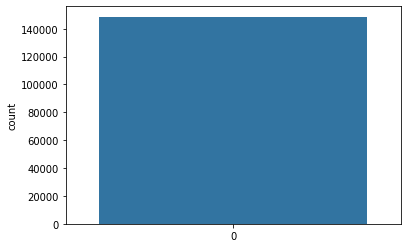

In [66]:
df=pd.read_csv('/content/creditcard.csv')
sns.countplot(df['Class'])

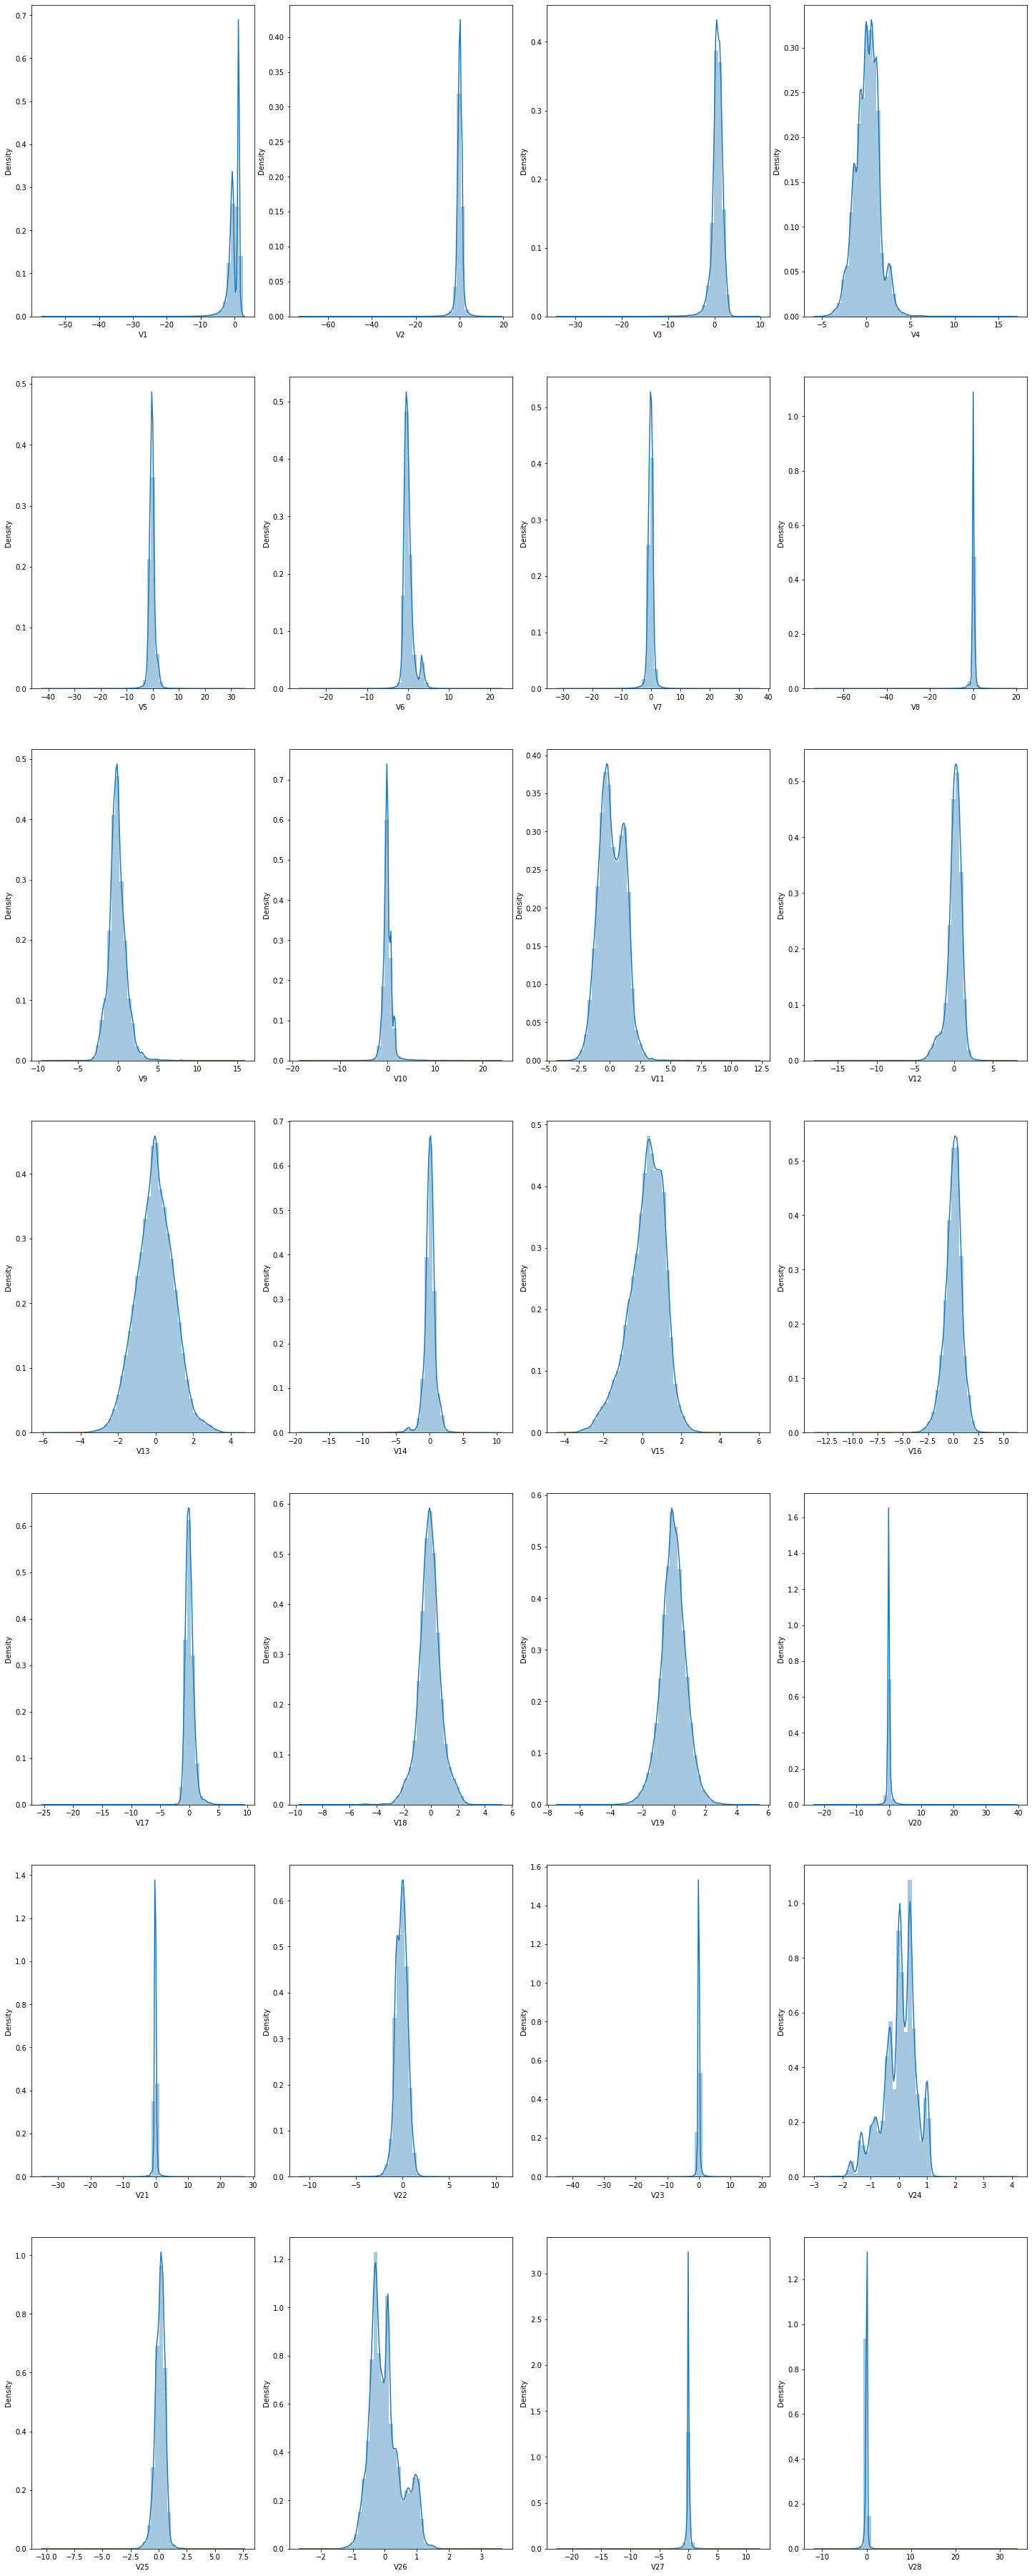

In [67]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Time', ylabel='Density'>

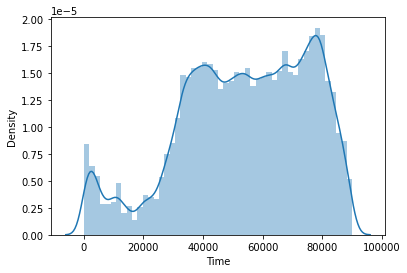

In [68]:
sns.distplot(df['Time'])

<Axes: xlabel='Amount', ylabel='Density'>

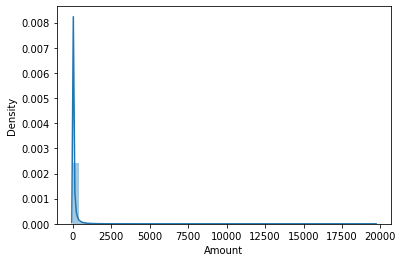

In [69]:
sns.distplot(df['Amount'])

#**Coorelation Matrix**

<Axes: >

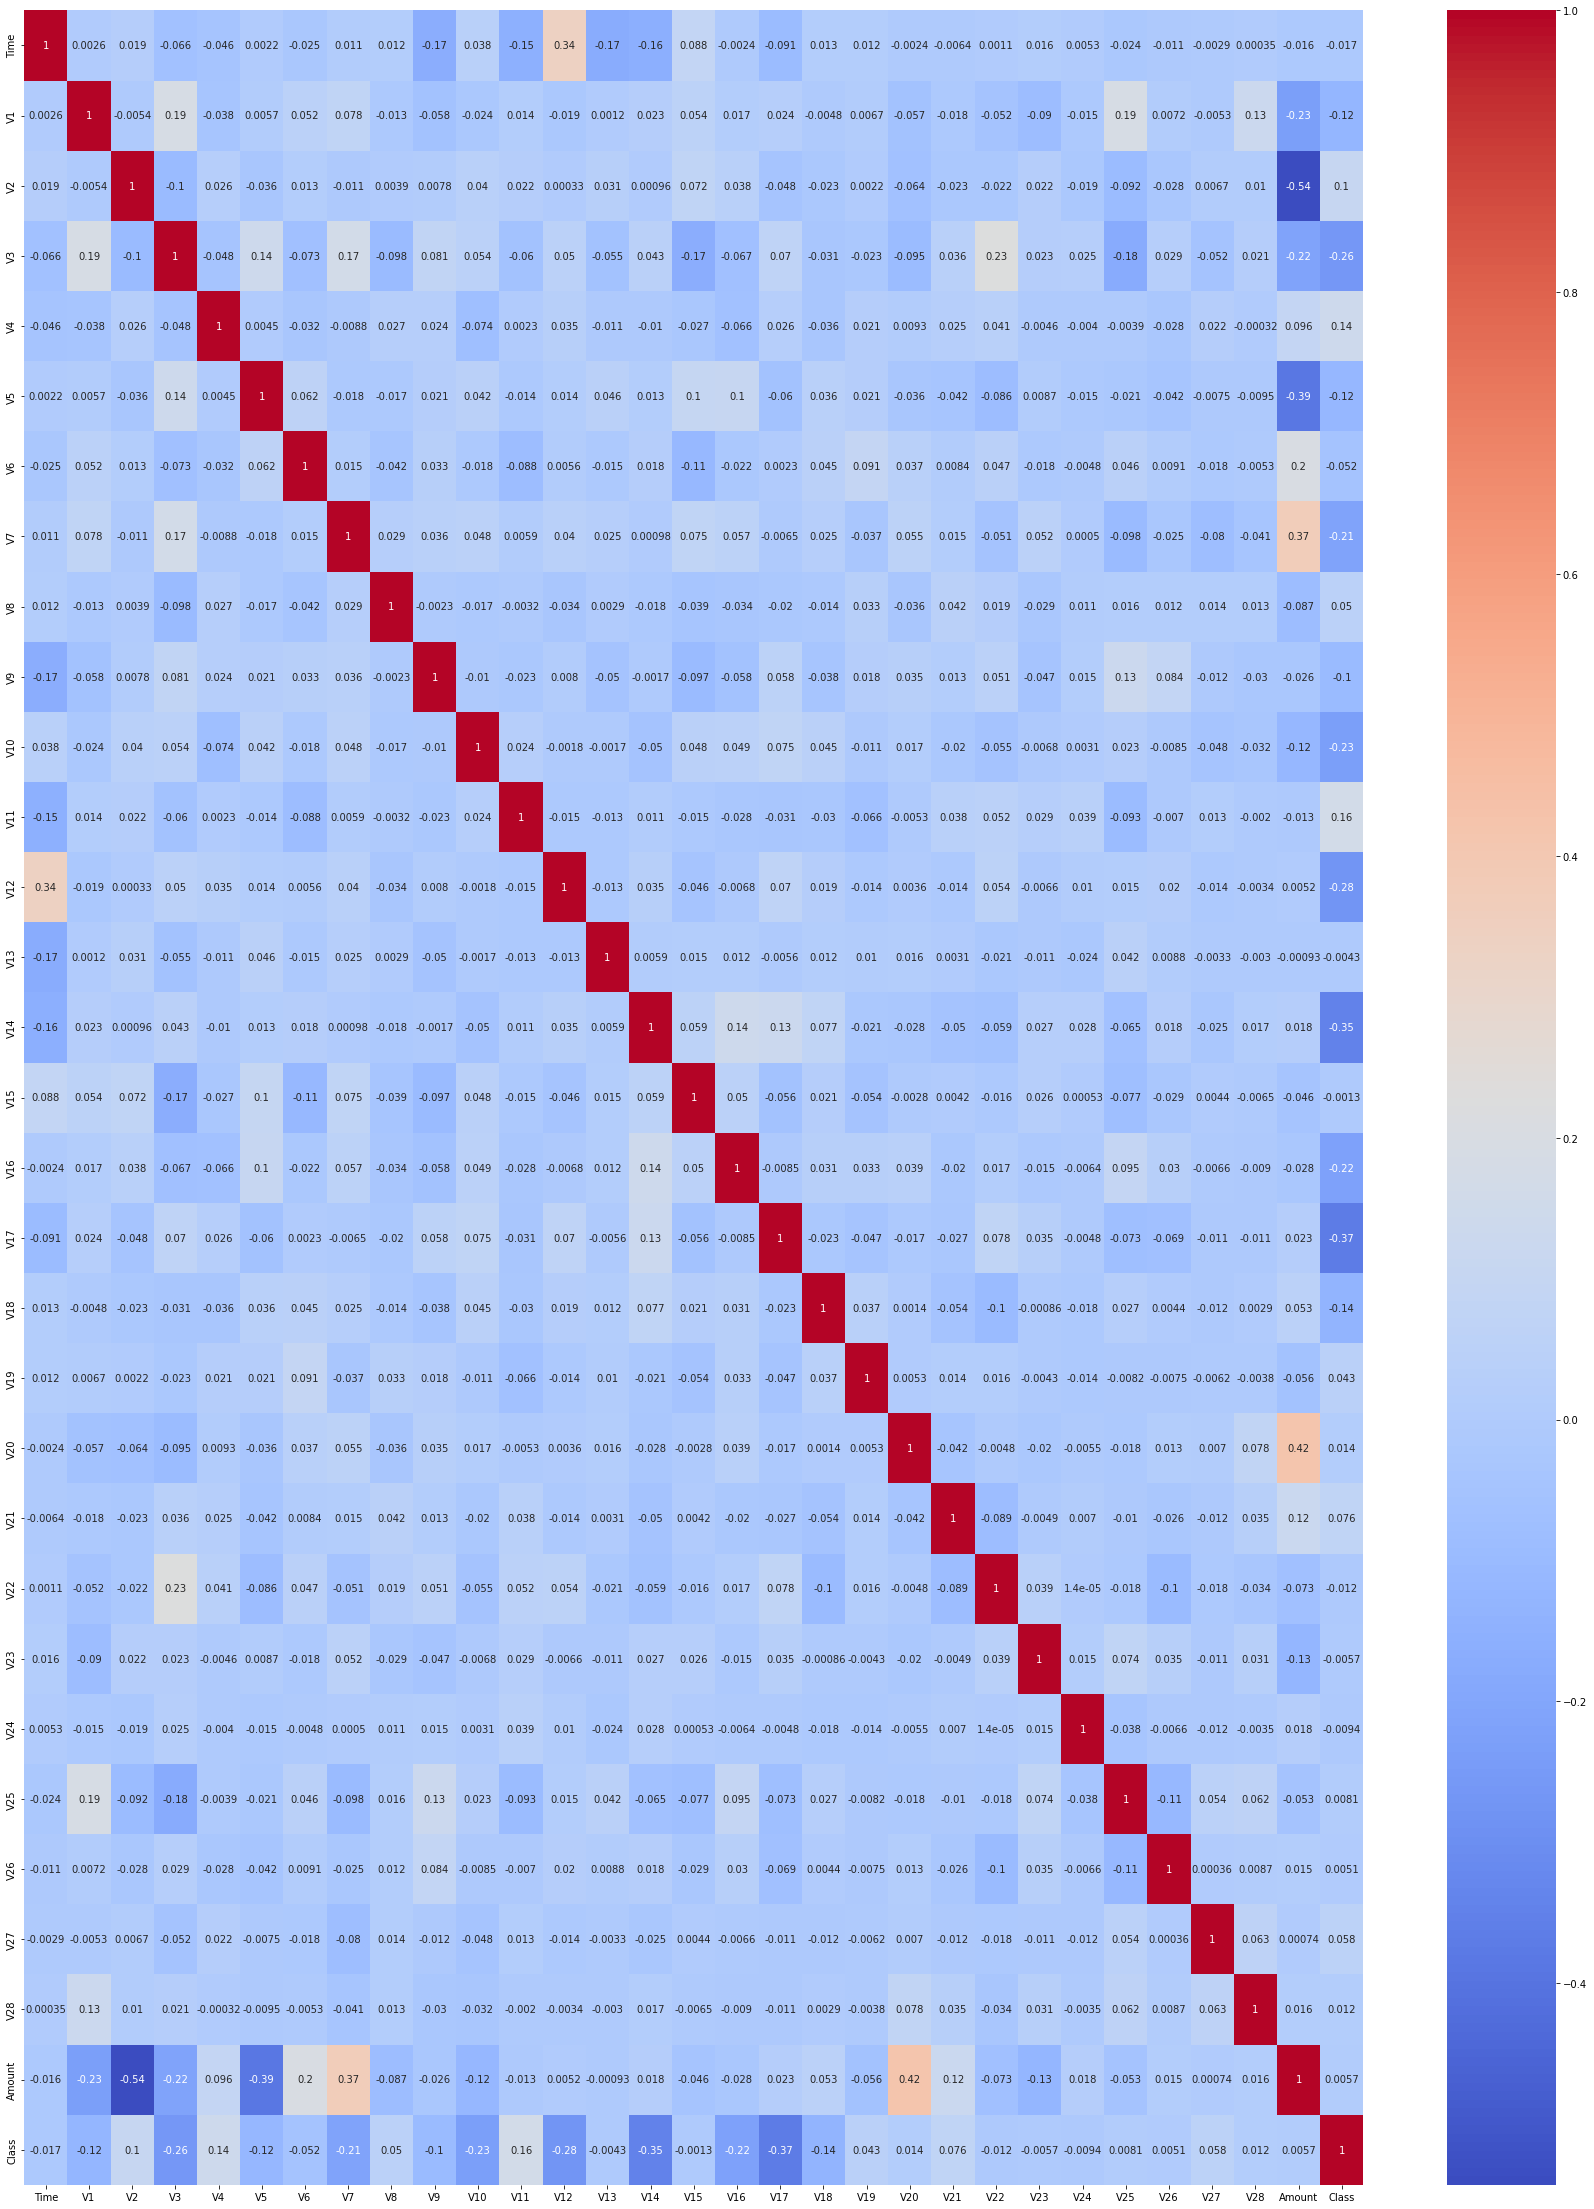

In [70]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')